In [2]:
# TensorFlow and tf.keras
import math
import tensorflow as tf
import numpy as np
from tensorflow import keras

import autokeras as ak

#tf version should be 2.5 or higher
tf.__version__

'2.5.0'

In [3]:
#get data
(train_images, train_labels), (test_images, test_labels) = \
      keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
#scale model
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
#reshape
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

In [35]:
from tensorflow.python.keras.layers.core import Dropout
#setup model
model = keras.Sequential([
   
    
    keras.layers.Conv2D(kernel_size=3, filters=32, use_bias=False, padding='same', input_shape=(28, 28 , 1)),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    
    
   
    
    
    
    keras.layers.Conv2D(kernel_size=6, filters=64, use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    
    
   
    
    keras.layers.Conv2D(kernel_size=6, filters=64, use_bias=False, padding='same', strides=2),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    
        
    
    
   
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(256, use_bias=False),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(128, use_bias=False),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64, use_bias=False),
    keras.layers.BatchNormalization(center=True, scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 32)        288       
_________________________________________________________________
batch_normalization_48 (Batc (None, 28, 28, 32)        96        
_________________________________________________________________
activation_48 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 64)        73728     
_________________________________________________________________
batch_normalization_49 (Batc (None, 14, 14, 64)        192       
_________________________________________________________________
activation_49 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 64)         

In [36]:
#compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [37]:
def lr_decay(epoch):
    return 0.01*math.pow(0.6, epoch)

lr_decay_callback=tf.keras.callbacks.LearningRateScheduler(lr_decay)

In [38]:
#train model
model.fit(train_images, train_labels, epochs=5, callbacks=[lr_decay_callback])

Epoch 1/5
1875/1875 [==============================] - 84s 44ms/step - loss: 0.5108 - accuracy: 0.8208
Epoch 2/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.3241 - accuracy: 0.8868
Epoch 3/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2567 - accuracy: 0.9094
Epoch 4/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2060 - accuracy: 0.9267
Epoch 5/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1652 - accuracy: 0.9419


In [39]:
#evaluate
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.2106 - accuracy: 0.9286

Test accuracy: 0.928600013256073


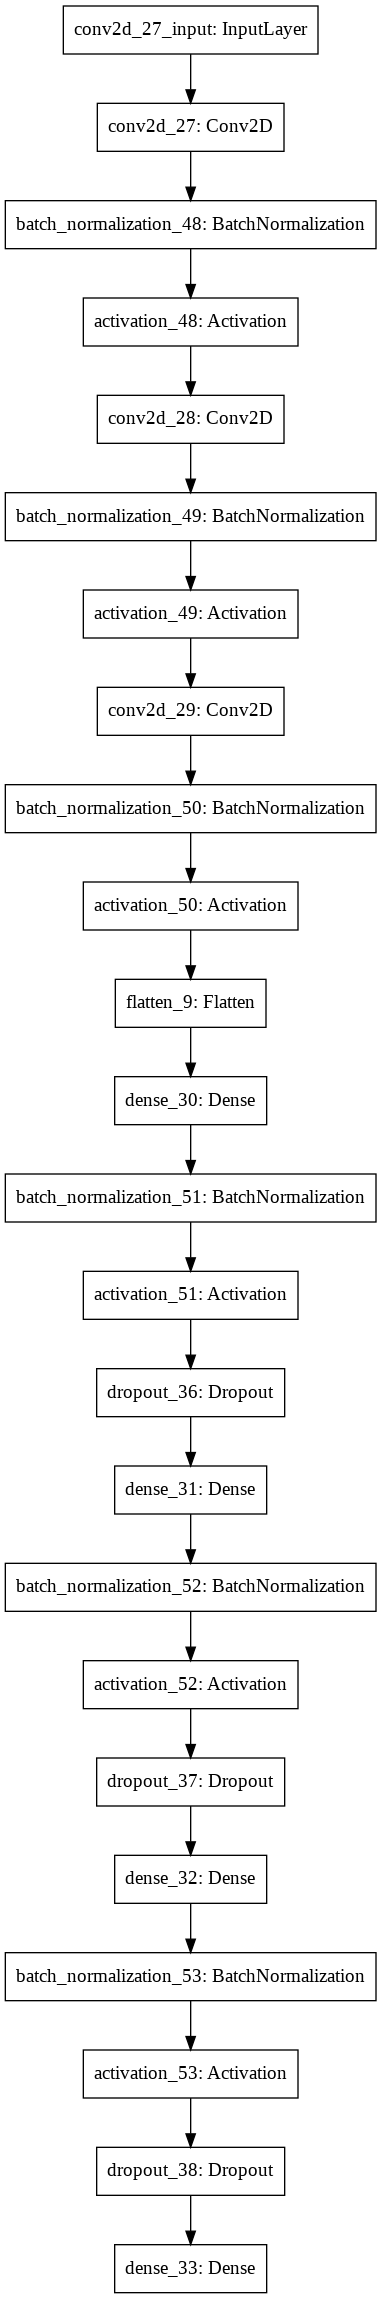

In [40]:
tf.keras.utils.plot_model(model)

In [41]:
epoch=0

In [42]:
clf = ak.ImageClassifier(overwrite=True, max_trials=2)

In [43]:


lr_decay_callback_ak=tf.keras.callbacks.LearningRateScheduler(lr_decay)

In [44]:
clf.fit(train_images, train_labels, epochs=5, callbacks=[lr_decay_callback_ak])


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
image_block_1/b...|vanilla           |?                 
image_block_1/n...|True              |?                 
image_block_1/a...|False             |?                 
image_block_1/c...|3                 |?                 
image_block_1/c...|1                 |?                 
image_block_1/c...|2                 |?                 
image_block_1/c...|True              |?                 
image_block_1/c...|False             |?                 
image_block_1/c...|0.25              |?                 
image_block_1/c...|32                |?                 
image_block_1/c...|64                |?                 
classification_...|flatten           |?                 
classification_...|0.5               |?                 
optimizer         |adam              |?                 
learning_rate     |0.001             |?                 

Epoch 1/5


KeyboardInterrupt: ignored

In [25]:
test_loss, test_acc = clf.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.3174 - accuracy: 0.8839

Test accuracy: 0.883899986743927


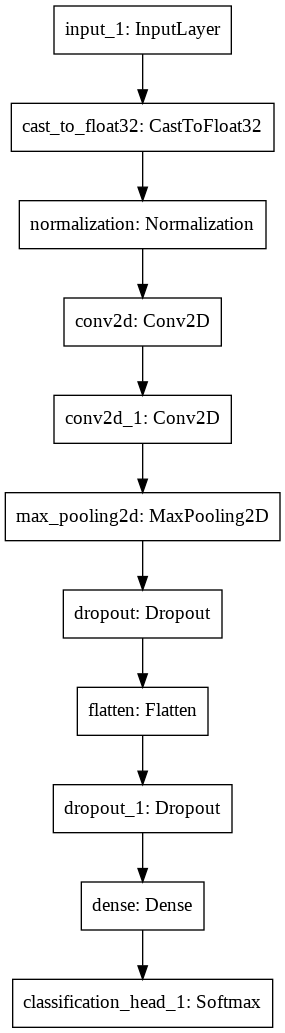

In [27]:
aoto = clf.export_model()

tf.keras.utils.plot_model(aoto)

In [28]:
aoto.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 28, 28, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 28, 28, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0     